In [1]:
from math import exp, sqrt
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import pylab


So = 100
r = 0.03
T = 1.0
n=20
k = 100
sig = 0.1


u = exp(sig/(sqrt(n)))
print("u :", format(u,'.3f'))

d = exp((-1*sig)/(sqrt(n)))
print("d :", format(d,'.3f'))

# combined  variable

z=r*T/n
print("z :", z)
# q: probablity of upmove, s: probablity of downmove
q=(exp(z)-d)/(u-d)
print("Prob.of upmove :", format(q,'.3f'))
s=1-q
print("Prob.of downmove :",format(s,'.3f'))







##OpPriceNode
#OpPriceNode = np.transpose(DisMat)*H

#print("Option prices")
#print(OpPriceNode)


u : 1.023
d : 0.978
z : 0.0015
Prob.of upmove : 0.528
Prob.of downmove : 0.472


In [2]:
#Define SS matrix

SS = [] 

for i in range((n)+1):
    SS.append([])
    for j in range((n)+1):
        SS[i].append(0)
    
for i in range((n)+1):
    for j in range(i+1):
        SS[i][j] = d**(i-j)*u**(j)


In [3]:
#Binomial Asset Prices 
PriceNodes = So*np.array(SS)

In [4]:
#Payoff Matrix
H0 = [] 
H1 = []

for i in range((n)+1):
    H0.append([])
    H1.append([])
    for j in range((n)+1):
        H0[i].append(0)
        H1[i].append(0)
    
for i in range((n)+1):
    for j in range(i+1):
            H0[i][j] = max(PriceNodes[i][j]-k,0) #call
            H1[i][j] = max(k-PriceNodes[i][j],0) #put

In [5]:
#European Option Node price
PriceNodeEurCall = np.zeros(((n)+1,(n)+1))
PriceNodeEurPut = np.zeros(((n)+1,(n)+1))

PriceNodeEurCall[(n),:] = H0[n][:]
PriceNodeEurPut[(n),:] = H1[n][:]

for i in reversed(range((n)+1)):
    for j in range(i):
        PriceNodeEurCall[i-1,j] = ((PriceNodeEurCall[i,j])*s + (PriceNodeEurCall[i,j+1])*q)*exp(-z)
        PriceNodeEurPut[i-1,j] = ((PriceNodeEurPut[i,j])*s + (PriceNodeEurPut[i,j+1])*q)*exp(-z)


In [6]:
#American Option Node price
PriceNodeAmCall = np.zeros(((n)+1,(n)+1))
PriceNodeAmPut = np.zeros(((n)+1,(n)+1))

PriceNodeAmCall[(n),:] = H0[((n))][:]
PriceNodeAmPut[(n),:] = H1[((n))][:]
EPAc = np.zeros(((n)+1,(n)+1))
EPAp = np.zeros(((n)+1,(n)+1))

for i in reversed(range((n)+1)):
    for j in range(i):
        PriceNodeAmCall[i-1,j] = max(((PriceNodeAmCall[i,j])*s + (PriceNodeAmCall[i,j+1])*q)*exp(-z),H0[i-1][j])
        PriceNodeAmPut[i-1,j] = max(((PriceNodeAmPut[i,j])*s + (PriceNodeAmPut[i,j+1])*q)*exp(-z),H1[i-1][j])        
        if((H0[i-1][j] > (PriceNodeAmCall[i,j])*s + (PriceNodeAmCall[i,j+1])*q)*exp(-z)):
            EPAc[i-1][j] = 1
        if((H1[i-1][j] > (PriceNodeAmPut[i,j])*s + (PriceNodeAmPut[i,j+1])*q)*exp(-z)):
            EPAp[i-1][j] = 1

for i in range(n+1):
    if(H0[n][i] > 0):
            EPAc[n][i] = 1
    if(H1[n][i] > 0):
            EPAp[n][i] = 1


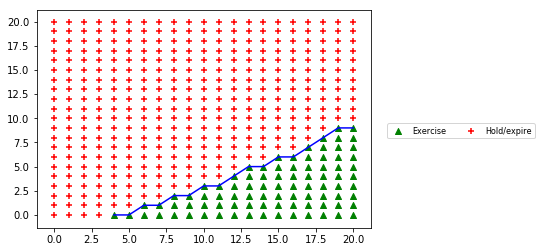

In [7]:
#Plot for puts

Ones_x = []
Ones_y = []
Zeroes_x = []
Zeroes_y = []


for i in range(n+1):
       for j in range(n+1):
            if(EPAp[i][j] == 0):
                Zeroes_x.append(j)
                Zeroes_y.append(i)
            else:
                Ones_x.append(j)
                Ones_y.append(i)

top_ones_x = []
top_ones_y = []
for i in reversed(range(n+1)):
    for j in reversed(range(n+1)):
        if(EPAp[i][j]==1):
            top_ones_x.append(j)
            top_ones_y.append(i)
            break
            
            
pylab.plot( top_ones_y,top_ones_x,'-b',label='Exercise frontier')
zero=plt.scatter(Zeroes_y,Zeroes_x, marker='+', c='r',label='Hold')
one=plt.scatter(Ones_y,Ones_x, marker='^', c='g',label='Exercise')
plt.legend((one,zero),('Exercise', 'Hold/expire'),numpoints=1, loc='upper right', bbox_to_anchor=(1.5, 0.5), ncol=2, fontsize=8)
plt.show()

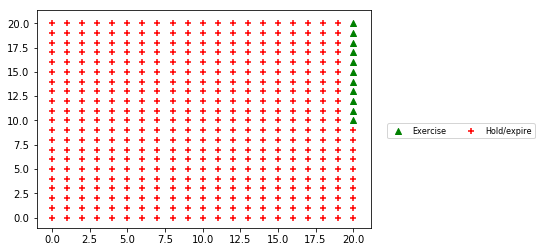

In [8]:
#Plot for calls

Ones_x = []
Ones_y = []
Zeroes_x = []
Zeroes_y = []


for i in range(n+1):
       for j in range(n+1):
            if(EPAc[i][j] == 0):
                Zeroes_x.append(j)
                Zeroes_y.append(i)
            else:
                Ones_x.append(j)
                Ones_y.append(i)

top_ones_x = []
top_ones_y = []
for i in reversed(range(n+1)):
    for j in reversed(range(n+1)):
        if(EPAc[i][j]==1):
            top_ones_x.append(j)
            top_ones_y.append(i)
            break
            
            
pylab.plot( top_ones_y,top_ones_x,'-b',label='Exercise frontier')
zero=plt.scatter(Zeroes_y,Zeroes_x, marker='+', c='r',label='Hold')
one=plt.scatter(Ones_y,Ones_x, marker='^', c='g',label='Exercise')
plt.legend((one,zero),('Exercise', 'Hold/expire'),numpoints=1, loc='upper right', bbox_to_anchor=(1.5, 0.5), ncol=2, fontsize=8)
plt.show()